In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('weather_data.csv')

# Display the first few rows
print(df.head())

       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df = df.dropna()

# Convert date column to datetime format (if applicable)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Display cleaned dataset
print(df.head())

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      1
dtype: int64
       Location           Date_Time  Temperature_C  Humidity_pct  \
0     San Diego 2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego 2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego 2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia 2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio 2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


<ipython-input-4-267b5a68ec16>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Time'] = pd.to_datetime(df['Date_Time'])


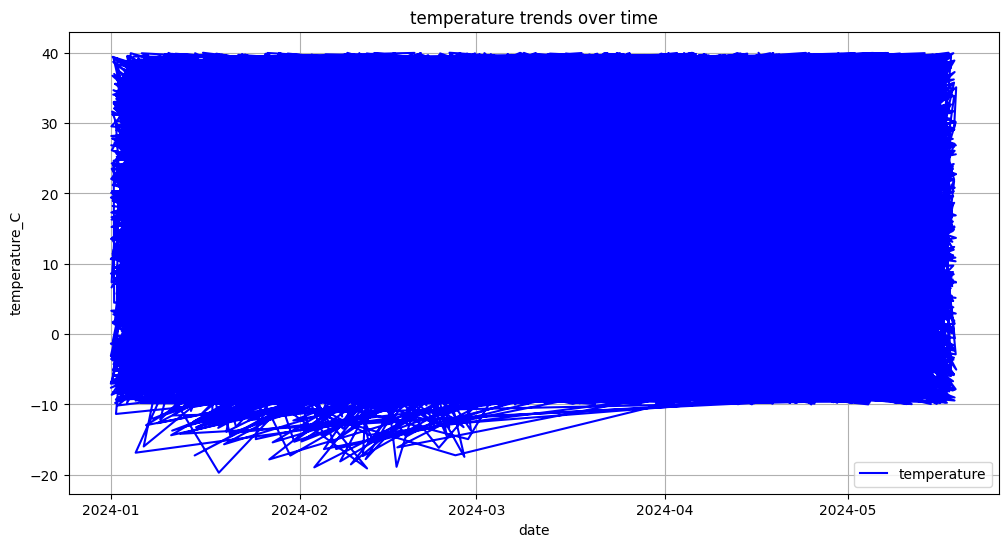

In [5]:
#Analyze temperature trends over time using line plots.
import matplotlib.pyplot as plt
#ploting temeperature over time
plt.figure(figsize=(12,6))
plt.plot(df['Date_Time'],df['Temperature_C'],color ='blue',label='temperature')
plt.title('temperature trends over time')
plt.xlabel('date')
plt.ylabel('temperature_C')
plt.legend()
plt.grid(True)
plt.show()

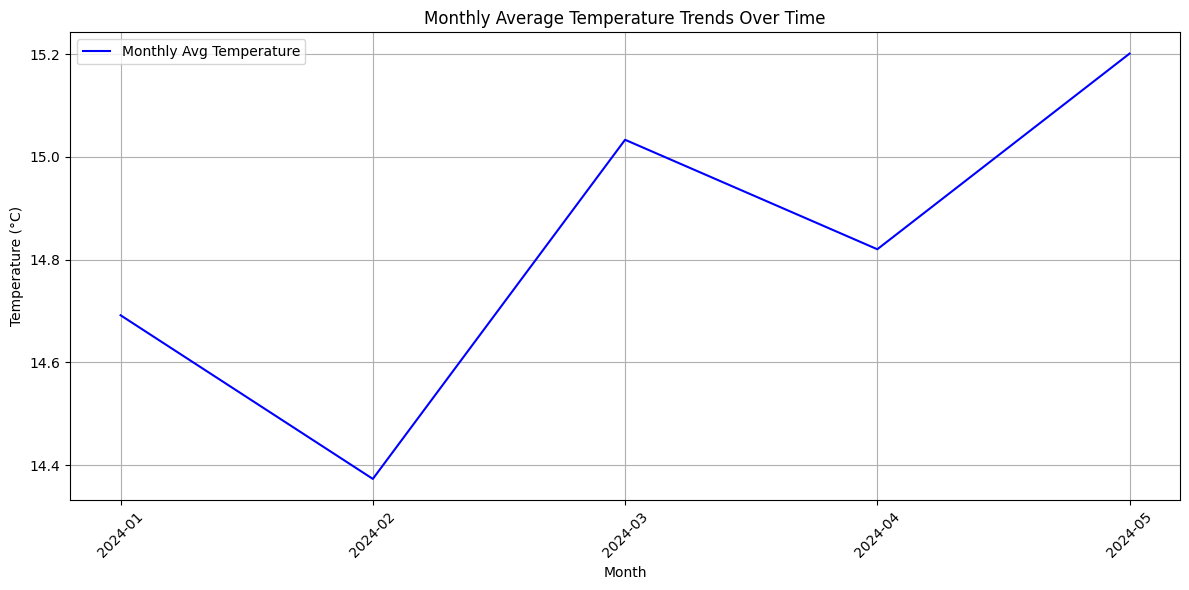

In [6]:
#as the graph is so conjusted as we took daily temerature and date and time so i converted into montly average and made the graph look clear
# Aggregate daily data into monthly averages

df['Month'] = df['Date_Time'].dt.to_period('M')  # Extract month from date
monthly_avg_temp = df.groupby('Month')['Temperature_C'].mean()

# Plot monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index.astype(str), monthly_avg_temp.values, color='blue', label='Monthly Avg Temperature')
plt.title('Monthly Average Temperature Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

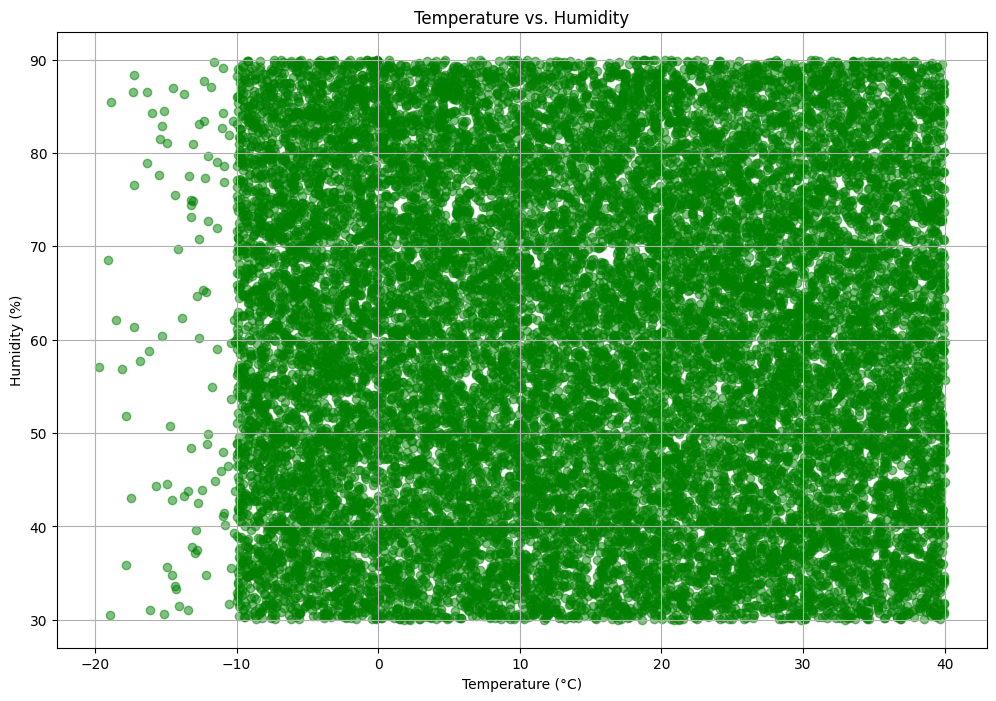

In [7]:
# Scatter plot: Temperature vs. Humidity
plt.figure(figsize=(12, 8))
plt.scatter(df['Temperature_C'], df['Humidity_pct'], color='green', alpha=0.5)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

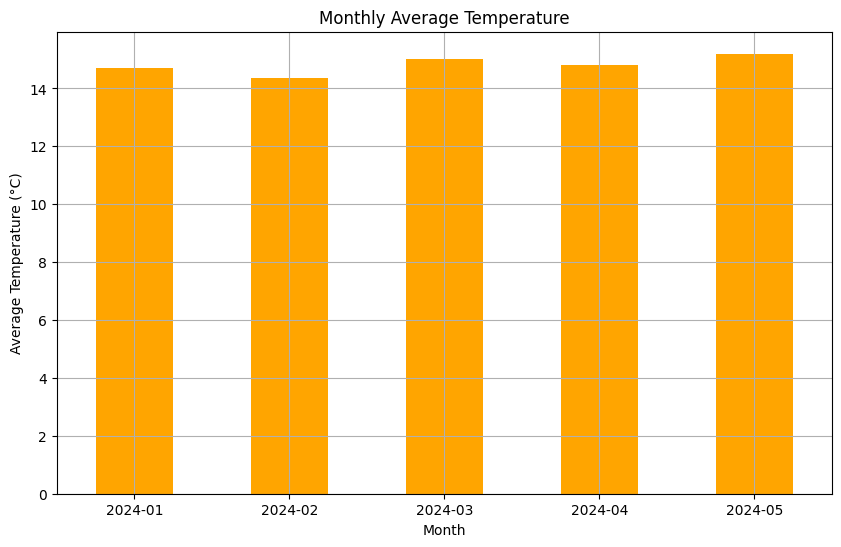

In [8]:
# Calculate monthly average temperature
monthly_avg_temp = df.groupby('Month')['Temperature_C'].mean()

# Plot monthly average temperature
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='orange')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

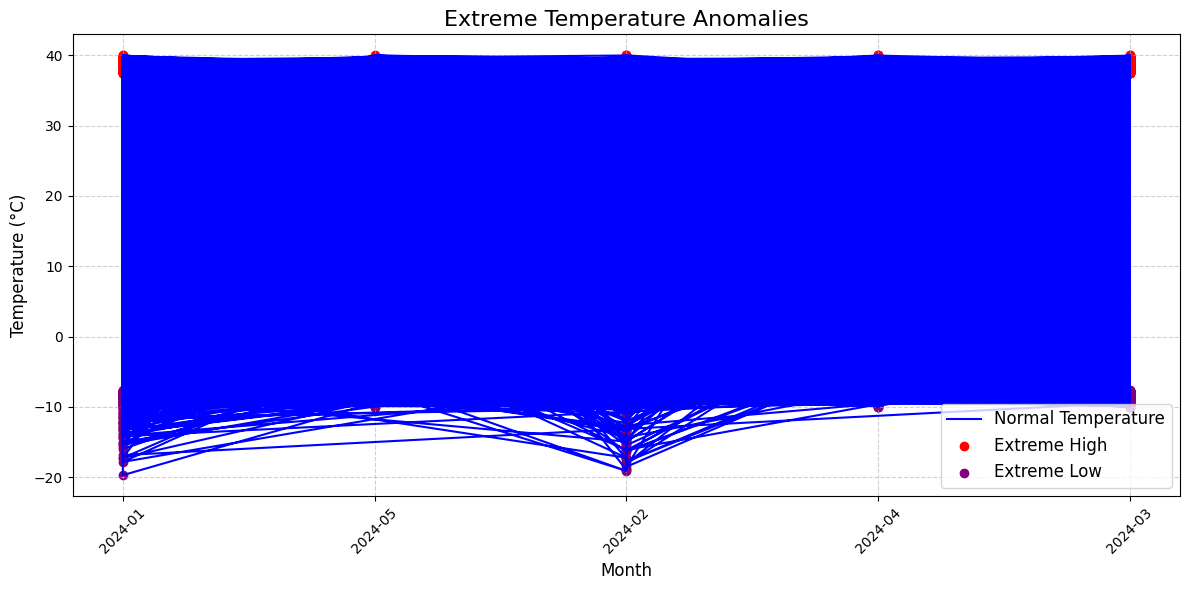

In [12]:
import matplotlib.pyplot as plt

# Define thresholds for extreme temperatures
high_threshold = df['Temperature_C'].quantile(0.95)  # Top 5% temperatures
low_threshold = df['Temperature_C'].quantile(0.05)   # Bottom 5% temperatures

# Filter extreme temperatures
extreme_high = df[df['Temperature_C'] > high_threshold]
extreme_low = df[df['Temperature_C'] < low_threshold]

# Plot extreme temperatures
plt.figure(figsize=(12, 6))
plt.plot(df['Month'].astype(str), df['Temperature_C'], color='blue', label='Normal Temperature')
plt.scatter(extreme_high['Month'].astype(str), extreme_high['Temperature_C'], color='red', label='Extreme High')
plt.scatter(extreme_low['Month'].astype(str), extreme_low['Temperature_C'], color='purple', label='Extreme Low')
#plt.plot(df['Month'], df['Temperature_C'], color='blue', label='Normal Temperature')
#plt.scatter(extreme_high['Month'], extreme_high['Temperature_C'], color='red', label='Extreme High')
#plt.scatter(extreme_low['Month'], extreme_low['Temperature_C'], color='purple', label='Extreme Low')

# Add titles and labels
plt.title('Extreme Temperature Anomalies', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(fontsize=12)  # Add a legend
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh', 'Month'],
      dtype='object')

TypeError: float() argument must be a string or a real number, not 'Period'

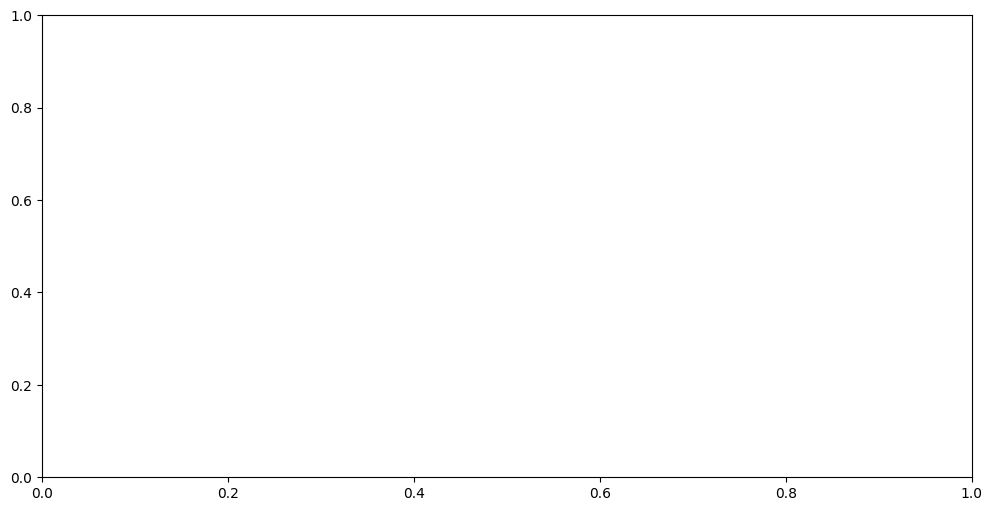

In [17]:
# Calculate moving average for temperature
df['Moving_Avg'] = df['Temperature_C'].rolling(window=7).mean()  # 7-day moving average

# Plot actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Temperature_C'], color='blue', label='Actual Temperature')
plt.plot(df['Month'], df['Moving_Avg'], color='red', label='7-Day Moving Average')
plt.title('Temperature Prediction Using Moving Average')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

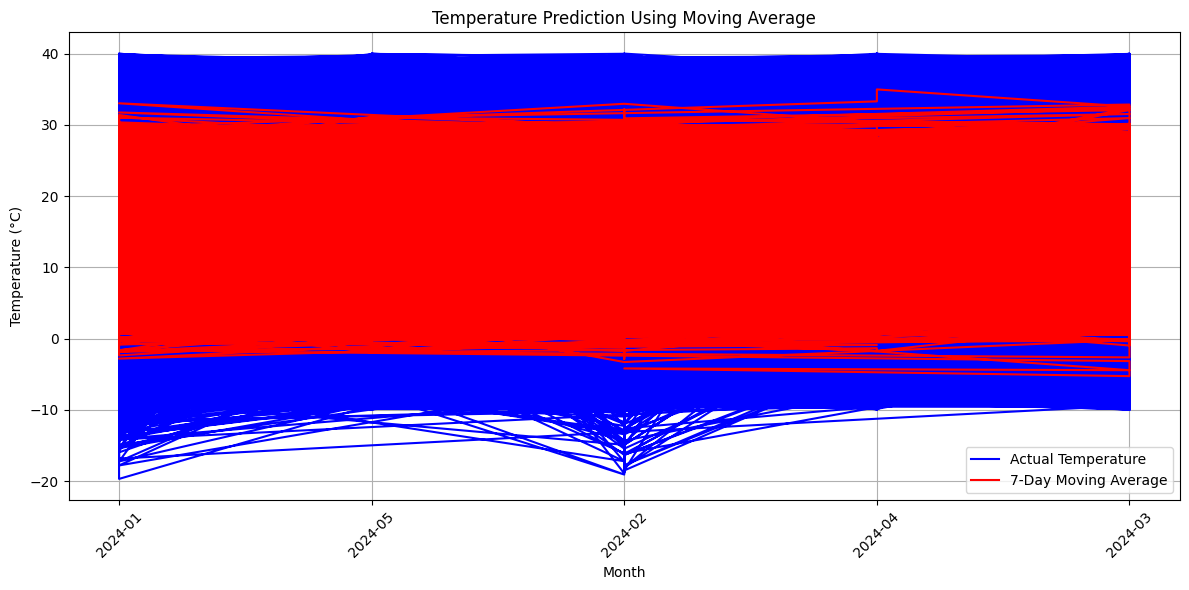

In [18]:
# Calculate moving average for temperature
df['Moving_Avg'] = df['Temperature_C'].rolling(window=7).mean()  # 7-day moving average

# Plot actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
# Convert 'Month' to strings for plotting
plt.plot(df['Month'].astype(str), df['Temperature_C'], color='blue', label='Actual Temperature')
plt.plot(df['Month'].astype(str), df['Moving_Avg'], color='red', label='7-Day Moving Average')
plt.title('Temperature Prediction Using Moving Average')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()